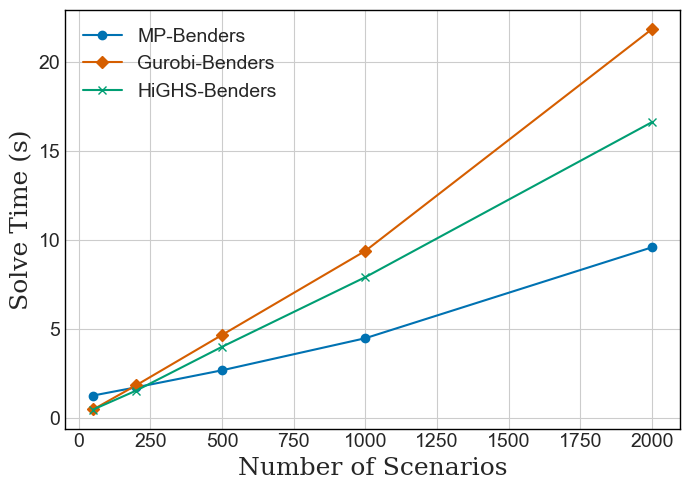

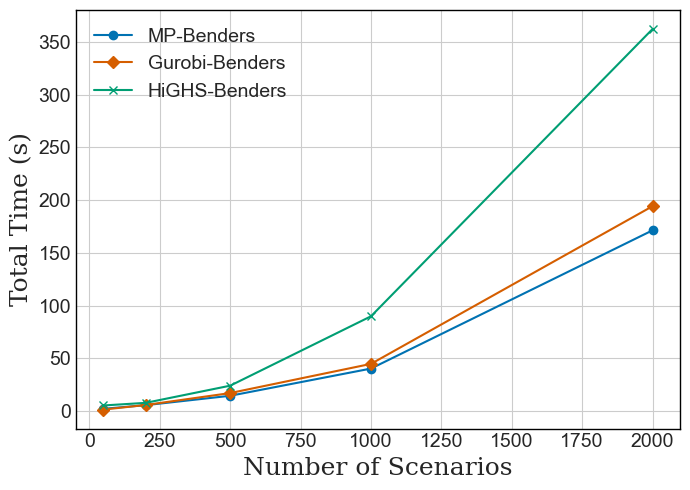

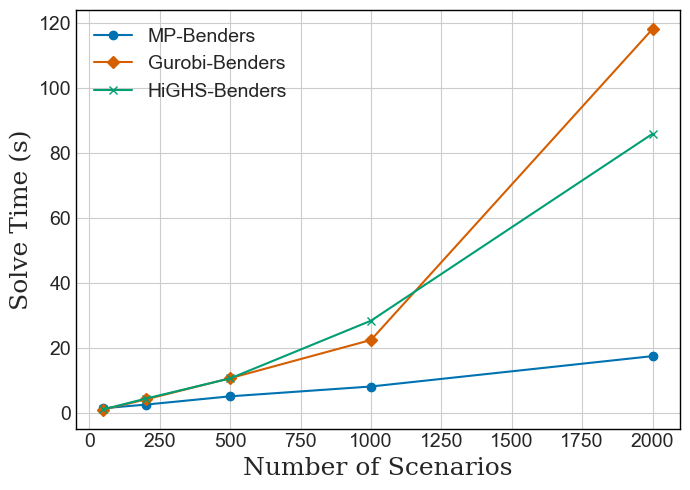

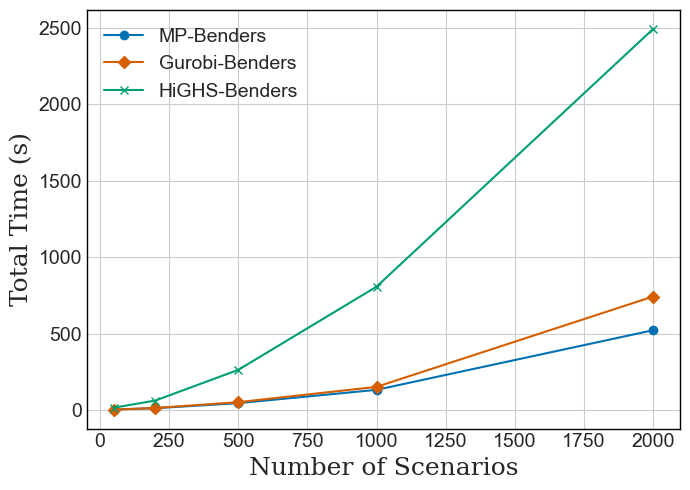

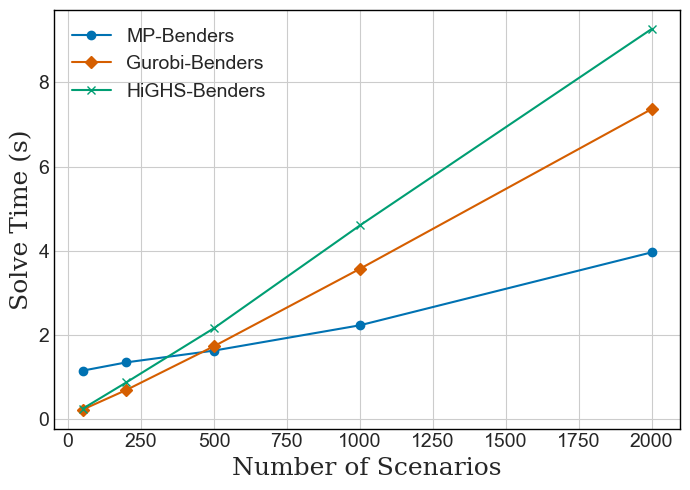

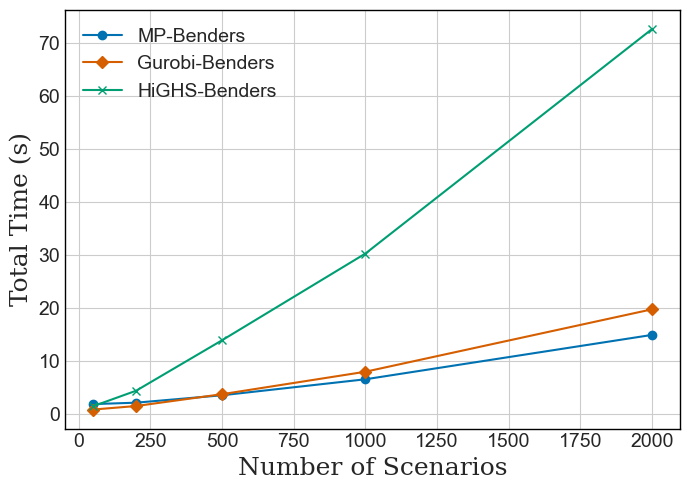

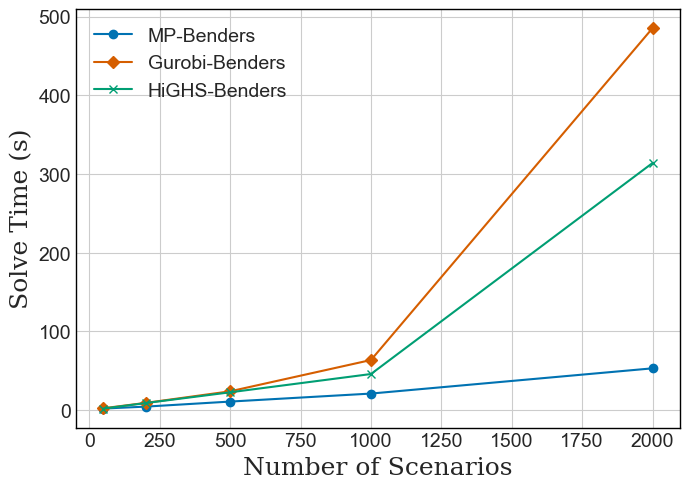

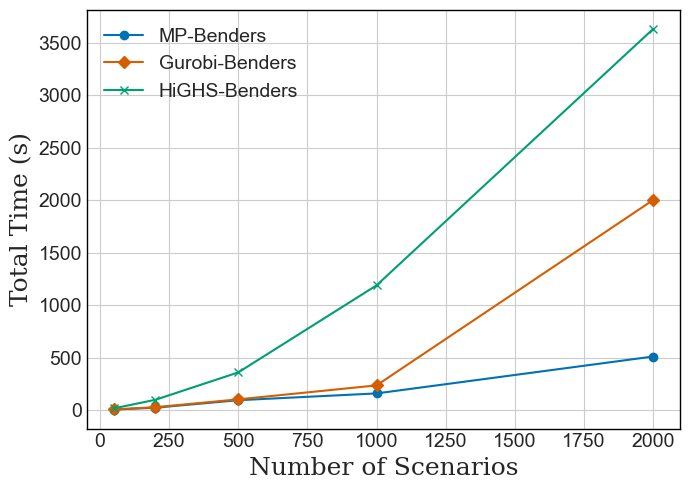

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# --- Main Customization Area ---
plot_params = {
    'font_style': 'serif',
    'title_fontsize': 16,
    'label_fontsize': 18,
    'tick_labelsize': 14,
    'legend_fontsize': 14,
    'border_color': 'black',
    'border_linewidth': 1,
    'figure_size': (7, 5),
    'style': 'seaborn-v0_8-whitegrid'
}

# Use the specified style
plt.style.use(plot_params['style'])

marker_map = {
    'MP-Benders': 'o',     # Circle
    'Gurobi-Benders': 'D', # Square
    'HiGHS-Benders': 'x'   # Diamond
}

def create_and_style_plot(ax, df, data_cols, labels, title, xlabel, ylabel, config):
    """
    Generates and styles a single plot based on the provided configuration.
    """
    for col in data_cols:
        current_label = labels[col]
        ax.plot(
            df['scens'], 
            df[col], 
            marker=marker_map[current_label],  # Use marker map
            label=current_label, 
            color=color_map[current_label]
        )

    ax.set_title(title, fontsize=config['title_fontsize'], fontname=config['font_style'])
    ax.set_xlabel(xlabel, fontsize=config['label_fontsize'], fontname=config['font_style'])
    ax.set_ylabel(ylabel, fontsize=config['label_fontsize'], fontname=config['font_style'])
    ax.tick_params(axis='both', which='major', labelsize=config['tick_labelsize'])
    for spine in ax.spines.values():
        spine.set_edgecolor(config['border_color'])
        spine.set_linewidth(config['border_linewidth'])
    ax.legend(fontsize=config['legend_fontsize'])
    ax.grid(True)

# --- Data Processing and Plotting Loop ---

# Column names and labels
solve_cols = [
    'MP_Gurobi_solve',
    'Plasmo_Gurobi_solve',
    'Plasmo_HiGHS_solve',
]
total_cols = [
    'MP_Gurobi_total',
    'Plasmo_Gurobi_total',
    'Plasmo_HiGHS_total',
]
solver_labels = {
    'MP_Gurobi_solve': 'MP-Benders',
    'Plasmo_Gurobi_solve': 'Gurobi-Benders',
    'MP_Gurobi_total': 'MP-Benders',
    'Plasmo_Gurobi_total': 'Gurobi-Benders',
    'Plasmo_HiGHS_solve': 'HiGHS-Benders',
    'Plasmo_HiGHS_total': 'HiGHS-Benders'
}

# NEW: Define your colors here
# Assign a color to each label used in the plots.
color_map = {
    'MP-Benders': '#0072B2',     # A nice blue
    'Gurobi-Benders': '#D55E00',  # A nice orange
    'HiGHS-Benders': '#009E73'   # A nice green
}


# Create folder for plots
os.makedirs("timing_plots_mp", exist_ok=True)

# List of files
csv_files = sorted(glob.glob("timing_results_time*.csv"))

for file in csv_files:
    df = pd.read_csv(file)
    time_tag = os.path.splitext(os.path.basename(file))[0].replace("timing_results_time", "")

    # Add 1.1 sec to MP solve and total times
    df['MP_Gurobi_solve'] += 1.1
    df['MP_Gurobi_total'] += 1.1

    # --- Solve time plot ---
    fig1, ax1 = plt.subplots(figsize=plot_params['figure_size'])
    create_and_style_plot(
        ax=ax1,
        df=df,
        data_cols=solve_cols,
        labels=solver_labels,
        # title=f"Subproblem Solve Time vs. Scenarios (time period: {time_tag})",
        title=f"",
        xlabel="Number of Scenarios",
        ylabel="Solve Time (s)",
        config=plot_params
    )
    fig1.tight_layout()
    
    plt.show()

    # --- Total time plot ---
    fig2, ax2 = plt.subplots(figsize=plot_params['figure_size'])
    create_and_style_plot(
        ax=ax2,
        df=df,
        data_cols=total_cols,
        labels=solver_labels,
        # title=f"Total Time vs. Scenarios (time period: {time_tag})",
        title=f"",
        xlabel="Number of Scenarios",
        ylabel="Total Time (s)",
        config=plot_params
    )
    fig2.tight_layout()
    fig1.savefig(f"timing_plots_mp/solve_time_{time_tag}_mc.png", dpi=600)
    fig2.savefig(f"timing_plots_mp/total_time_{time_tag}_mc.png", dpi=600)
    plt.show()